In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
from sklearn.pipeline import Pipeline
from sklearn import compose
from sklearn import impute
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [26]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import median_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from scipy.stats import uniform

In [30]:
#install one of this package if error occurs
# conda install -c conda-forge rfpimp
# conda install -c conda-forge/label/gcc7 rfpimp
# conda install -c conda-forge/label/cf201901 rfpimp
# conda install -c conda-forge/label/cf202003 rfpimp

from rfpimp import *

In [31]:
file = r"C:\Users\Mr. Jarvis\Desktop\garment\customer_details.json"

In [32]:
customer = pd.read_json(file , lines=True)

In [33]:
customer.head()

,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,fit,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016"
1,fit,273551,34b,153475,132lbs,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013"
2,fit,360448,NaN,1063761,NaN,10.0,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116.0,"December 14, 2015"
3,fit,909926,34c,126335,135lbs,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0,"February 12, 2014"
4,fit,151944,34b,616682,145lbs,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0,"September 26, 2016"


In [34]:
customer.dtypes

fit                object
user_id             int64
bust size          object
item_id             int64
weight             object
rating            float64
rented for         object
review_text        object
body type          object
review_summary     object
category           object
height             object
size                int64
age               float64
review_date        object
dtype: object

In [35]:
customer.isnull().sum()

fit                   0
user_id               0
bust size         18411
item_id               0
weight            29982
rating               82
rented for           10
review_text           0
body type         14637
review_summary        0
category              0
height              677
size                  0
age                 960
review_date           0
dtype: int64

In [41]:
list(zip(customer.columns , customer.dtypes , customer.nunique()))

[('fit', dtype('O'), 3),
 ('user_id', dtype('int64'), 105571),
 ('bust size', dtype('O'), 106),
 ('item_id', dtype('int64'), 5850),
 ('weight', dtype('O'), 190),
 ('rating', dtype('float64'), 5),
 ('rented for', dtype('O'), 9),
 ('review_text', dtype('O'), 191031),
 ('body type', dtype('O'), 7),
 ('review_summary', dtype('O'), 154740),
 ('category', dtype('O'), 68),
 ('height', dtype('O'), 24),
 ('size', dtype('int64'), 56),
 ('age', dtype('float64'), 89),
 ('review_date', dtype('O'), 2274)]

In [42]:
customer["unique_id"] = customer.index

In [43]:
customer["unique_id"]

0              0
1              1
2              2
3              3
4              4
           ...  
192539    192539
192540    192540
192541    192541
192542    192542
192543    192543
Name: unique_id, Length: 192544, dtype: int64

In [44]:
customer_fit_df = customer.groupby('fit').agg({'unique_id': 'count'}).reset_index()

In [45]:
customer_fit_df

,fit,unique_id
0,fit,142058
1,large,24707
2,small,25779


In [46]:
customer_fit_df.columns = ['fit', 'count']

In [47]:
customer_fit_df.columns

Index(['fit', 'count'], dtype='object')

In [48]:
type(customer_fit_df.columns)

pandas.core.indexes.base.Index

In [63]:
value_c = customer["fit"].value_counts()

In [64]:
value_c

fit      142058
small     25779
large     24707
Name: fit, dtype: int64

#### https://seaborn.pydata.org/tutorial/aesthetics.html

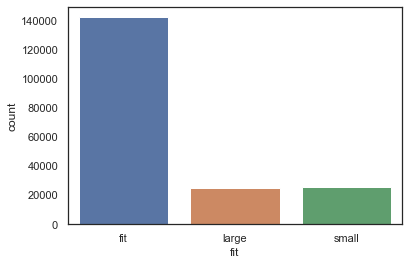

In [56]:
sns.set(style="white")
customer_barplot = sns.barplot(x = "fit", y = "count", data = customer_fit_df)

In [66]:
customer_fit_size_df = customer.groupby('fit').agg({'size':'median'}).reset_index()

In [67]:
customer_fit_size_df

,fit,size
0,fit,12
1,large,8
2,small,13


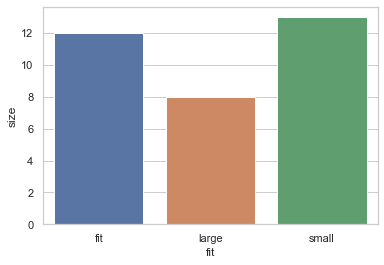

In [69]:
sns.set(style="whitegrid")
sns.barplot(x = "fit", y = "size", data = customer_fit_size_df)

#### bust size

In [82]:
customer.shape

(192544, 16)

In [79]:
customer = customer.rename(columns={"bust size" : "bust_size"})

In [83]:
customer.head()

,fit,user_id,bust_size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date,unique_id
0,fit,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016",0
1,fit,273551,34b,153475,132lbs,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013",1
2,fit,360448,NaN,1063761,NaN,10.0,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116.0,"December 14, 2015",2
3,fit,909926,34c,126335,135lbs,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0,"February 12, 2014",3
4,fit,151944,34b,616682,145lbs,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0,"September 26, 2016",4


In [84]:
def convert_bust_size(bust_size):
    """Convert bust size like 34B into a numeric value that combines band size and cup size"""
    bust_size_num=bust_size.str[:2]
    bust_size_alpha=bust_size.str[2:]
    bust_size_alpha= bust_size_alpha.map({'aa':0.5,'a':1,'b':2,'c':3,'d':4,'d+':5,'dd':6,'ddd/e':7,'f':8,'g':9,'h':10,'i':11,'j':12})
    bust_size_sum = bust_size_num.astype(int)+bust_size_alpha
    
    return bust_size_sum

In [87]:
customer['bust_size_num'] = convert_bust_size(customer[~(customer.bust_size.isna())]['bust_size'])

In [88]:
customer['bust_size_num']

0         38.0
1         36.0
2          NaN
3         37.0
4         36.0
          ... 
192539    40.0
192540    35.0
192541    37.0
192542    39.0
192543    38.0
Name: bust_size_num, Length: 192544, dtype: float64

In [89]:
customer.shape

(192544, 17)

#### height

In [90]:
def convert_height(height):
    """Convert height like 5'7 into a single numeric value in meter"""
    height_meter_scale = height.map(lambda x: x.replace(" ", "").\
                          replace('"', "").split("'")).\
                          map(lambda x: 0.0254*(int(x[0])*12+int(x[1]))).\
                          map(lambda x: "{:.4f}".format(x))
    height_meter_scale = height_meter_scale.astype(float)
    return height_meter_scale

In [91]:
customer['height'] = convert_height(customer[~(customer.height.isna())]['height'])

In [92]:
customer['height']

0         1.7272
1         1.6764
2         1.6256
3         1.6510
4         1.7526
           ...  
192539    1.7526
192540    1.5494
192541    1.7272
192542    1.6764
192543    1.6764
Name: height, Length: 192544, dtype: float64

In [93]:
customer['height'].isnull().sum()

677

#### weight

In [94]:
customer["weight"].value_counts()

130lbs    14370
135lbs    13705
125lbs    12869
140lbs    12162
120lbs    10687
          ...  
243lbs        1
86lbs         1
273lbs        1
237lbs        1
264lbs        1
Name: weight, Length: 190, dtype: int64

In [95]:
# Cleaning weight and slice out the 'lbs'

customer['weight'] = customer.weight.str.slice(0,-3)

In [96]:
customer['weight'].value_counts()

130    14370
135    13705
125    12869
140    12162
120    10687
       ...  
253        1
243        1
261        1
86         1
87         1
Name: weight, Length: 190, dtype: int64

In [97]:
customer.dtypes

fit                object
user_id             int64
bust_size          object
item_id             int64
weight             object
rating            float64
rented for         object
review_text        object
body type          object
review_summary     object
category           object
height            float64
size                int64
age               float64
review_date        object
unique_id           int64
bust_size_num     float64
dtype: object

In [98]:
# Convert other numeric features to float

numrical_features = ['rating','size','age','weight']

for features in numrical_features:
    customer[features] = customer[features].astype(float)

#### age

In [99]:
customer["age"].value_counts()

31.0     14522
30.0     14145
29.0     13589
32.0     13508
28.0     11965
         ...  
88.0         1
85.0         1
9.0          1
113.0        1
81.0         1
Name: age, Length: 89, dtype: int64

In [100]:
customer.loc[(customer.age<20),'age_range']='Teens'
customer.loc[((customer.age>=20) & (customer.age<25)),'age_range']='Early 20s'
customer.loc[((customer.age>=25) & (customer.age<30)),'age_range']='Late 20s'
customer.loc[((customer.age>=30) & (customer.age<40)),'age_range']='30s'
customer.loc[(customer.age>40),'age_range']='40s +'

#### Frequency Encoding
#### item_id: do more popular clothing items tend to fit customers better?
#### body_type: is it easier for more common body types to find clothes to fit?

In [102]:
def frequency_encoding(col):
    """Frequency encode the input column"""
    col_count = col.value_counts()
    return col.map(col_count)

In [103]:
customer['items_count'] = frequency_encoding(customer['item_id'])

In [104]:
customer['items_count']

0           28
1          519
2           81
3         2241
4          114
          ... 
192539      44
192540      68
192541     130
192542    2241
192543    1393
Name: items_count, Length: 192544, dtype: int64

In [107]:
print(customer.dtypes)
print(customer.shape)

fit                object
user_id             int64
bust_size          object
item_id             int64
weight            float64
rating            float64
rented for         object
review_text        object
body type          object
review_summary     object
category           object
height            float64
size              float64
age               float64
review_date        object
unique_id           int64
bust_size_num     float64
age_range          object
items_count         int64
dtype: object
(192544, 19)


In [108]:
customer = customer.rename(columns={"body type" : "body_type"})

In [109]:
customer.head()

,fit,user_id,bust_size,item_id,weight,rating,rented for,review_text,body_type,review_summary,category,height,size,age,review_date,unique_id,bust_size_num,age_range,items_count
0,fit,420272,34d,2260466,137.0,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,1.7272,14.0,28.0,"April 20, 2016",0,38.0,Late 20s,28
1,fit,273551,34b,153475,132.0,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,1.6764,12.0,36.0,"June 18, 2013",1,36.0,30s,519
2,fit,360448,NaN,1063761,NaN,10.0,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,1.6256,4.0,116.0,"December 14, 2015",2,NaN,40s +,81
3,fit,909926,34c,126335,135.0,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,1.6510,8.0,34.0,"February 12, 2014",3,37.0,30s,2241
4,fit,151944,34b,616682,145.0,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,1.7526,12.0,27.0,"September 26, 2016",4,36.0,Late 20s,114


In [110]:
customer['body_type_count'] = frequency_encoding(customer['body_type'])

In [111]:
customer['body_type_count']

0         55349.0
1         14742.0
2             NaN
3         22135.0
4         43667.0
           ...   
192539    55349.0
192540    22131.0
192541    14742.0
192542    22135.0
192543    43667.0
Name: body_type_count, Length: 192544, dtype: float64

#### Label Encoding
#### https://www.google.com/search?q=label+encoding+and+one+hot+encoding+in+python&oq=label+encoding+in+python&aqs=chrome.1.69i57j0l7.21723j0j7&sourceid=chrome&ie=UTF-8

In [112]:
def df_string_to_cat(df, cat_col):
    """Convert string value of a categorical variable into ordinal variable """
    for col in cat_col:
        df[col] = df[col].astype('category')
        df[col] = df[col].cat.as_ordered()
def df_cat_to_catcode(df, cat_col):
    """Convert ordinal variable into numeric values """
    for col in cat_col:
        df[col] = df[col].cat.codes + 1

In [113]:
customer.dtypes

fit                 object
user_id              int64
bust_size           object
item_id              int64
weight             float64
rating             float64
rented for          object
review_text         object
body_type           object
review_summary      object
category            object
height             float64
size               float64
age                float64
review_date         object
unique_id            int64
bust_size_num      float64
age_range           object
items_count          int64
body_type_count    float64
dtype: object

In [116]:
customer = customer.rename(columns={"rented for" : "rented_for"})

In [117]:
cat_col = ['body_type','category','item_id','rented_for','age_range']

In [118]:
df_string_to_cat(customer,cat_col)

In [119]:
df_cat_to_catcode(customer,cat_col)

#### Train-test split

#### Since our "fit" data is a bit unblanced, we're doing a proper train test split here to ensure the same distribution of minortiy classes in both train set and test set. We also upsample the minority classes in the training set.

In [121]:
# Proper split to ensure 20% minority class

customer_fit = customer[customer['fit']=='fit'] 
customer_small = customer[customer['fit']=='small'] 
customer_large = customer[customer['fit']=='large'] 

In [122]:
customer_train_fit, customer_test_fit = train_test_split(customer_fit, test_size=0.20) 

In [123]:
customer_train_small, customer_test_small = train_test_split(customer_small, test_size=0.20)

In [124]:
customer_train_large, customer_test_large = train_test_split(customer_large, test_size=0.20)

In [125]:
customer_train = pd.concat([customer_train_fit, customer_train_small , customer_train_large], axis=0) 

In [126]:
customer_test = pd.concat([customer_test_fit, customer_test_small , customer_test_large], axis=0)

#### upsample
#### https://chrisalbon.com/machine_learning/preprocessing_structured_data/handling_imbalanced_classes_with_upsampling/
#### https://elitedatascience.com/imbalanced-classes
#### https://www.google.com/search?q=upsample+python&oq=upsample+&aqs=chrome.1.69i57j0l7.34452j0j9&sourceid=chrome&ie=UTF-8

#### Upsmaple the fit small and fit large data

In [127]:
customer_small_balanced = customer_train_small.sample(int(len(customer_train_small)*2), replace=True) 

In [128]:
customer_large_balanced = customer_train_large.sample(int(len(customer_train_large)*2), replace=True) 

In [129]:
customer_train_upsampled = pd.concat([customer_train_fit, customer_small_balanced , customer_large_balanced ], axis=0)

In [130]:
X_train = customer_train_upsampled.drop(['fit'], axis=1)

In [131]:
X_test = customer_test.drop(['fit'], axis=1)

In [132]:
y_train = customer_train_upsampled['fit']

In [133]:
y_test = customer_test['fit']

##### pipeline
#### https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html

#### we can take different models for observation 

In [150]:
def make_pipeline():
    "Create a single pipeline that processing the data and then fits the regressor."
    features = ['height', 'size', 'weight', 'bust_size_num', 'body_type_count', 'rating',
                        'body_type', 'category', 'item_id', 'rented_for', 'age_range']
    transformer = Pipeline(
        steps=[('imputer', impute.SimpleImputer(strategy='median'))])
    
    preprocessor = compose.ColumnTransformer(transformers=[
        ('num', transformer, features)])

    standard_scaler = StandardScaler()
    
    rf = RandomForestClassifier(random_state=42)
    nb = GaussianNB()
    knn = KNeighborsClassifier()
    lr = LogisticRegression(random_state=42)
    
    classifier_no_scaling = [rf, nb]
    classifier_with_scaling = [knn, lr]

    pipeline = []
    for classifier in classifier_no_scaling:
        pipe = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('classifier', classifier)])
        pipeline.append(pipe)
        
    pipeline_with_scaling = []
    for classifier in classifier_with_scaling:
        pipe = Pipeline(steps=[('preprocessor', preprocessor), 
                               ('standard scaler', standard_scaler), 
                               ('classifier', classifier)])
        pipeline_with_scaling.append(pipe)
        
    pipeline.extend(pipeline_with_scaling)

    return pipeline

In [151]:
pipelines = make_pipeline()

In [152]:
for pipe in pipelines:
    pipe.fit(X_train, y_train)

C:\Users\Mr. Jarvis\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Mr. Jarvis\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Mr. Jarvis\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


#### Sort our models using Accuracy Score

In [153]:
def sort_models(pipelines, X_data, y_data, metric1=f1_score, metric2=accuracy_score,average='weighted'):
    """Sort models based on their f1 score."""
    scores = []
    for pipe in pipelines:
        y_pred = pipe.predict(X_data)
        f1_score = metric1(y_data, y_pred, average=average)
        accuracy_score = metric2(y_data, y_pred)
        classfier_name = pipe.steps[-1][1].__class__.__name__.split('.')[-1]
        scores.append([classfier_name,f1_score,accuracy_score])
    scores_sorted = sorted(scores,key=lambda x:x[1],reverse=True)
    
    return scores_sorted

In [154]:
sorted_model = sort_models(pipelines, X_train, y_train, metric1=f1_score, metric2=accuracy_score, average='weighted')

In [155]:
sorted_model

[['RandomForestClassifier', 0.9941103767824307, 0.9941158922344179],
 ['KNeighborsClassifier', 0.7885565549760107, 0.7874366069683472],
 ['GaussianNB', 0.5090780850615829, 0.5998549546861981],
 ['LogisticRegression', 0.5007483899727133, 0.5969849091152236]]

In [156]:
sort_model_dataframe = pd.DataFrame(sorted_model)

In [157]:
sort_model_dataframe

,0,1,2
0,RandomForestClassifier,0.994110,0.994116
1,KNeighborsClassifier,0.788557,0.787437
2,GaussianNB,0.509078,0.599855
3,LogisticRegression,0.500748,0.596985


In [158]:
sort_model_dataframe.columns = ['Model','F1 Score','Accuracy Score']

In [159]:
sort_model_dataframe

,Model,F1 Score,Accuracy Score
0,RandomForestClassifier,0.994110,0.994116
1,KNeighborsClassifier,0.788557,0.787437
2,GaussianNB,0.509078,0.599855
3,LogisticRegression,0.500748,0.596985


#### https://pandas.pydata.org/docs/reference/api/pandas.melt.html

In [160]:
sort_model_dataframe = pd.melt(sort_model_dataframe,id_vars=['Model'])

In [161]:
sort_model_dataframe

,Model,variable,value
0,RandomForestClassifier,F1 Score,0.994110
1,KNeighborsClassifier,F1 Score,0.788557
2,GaussianNB,F1 Score,0.509078
3,LogisticRegression,F1 Score,0.500748
4,RandomForestClassifier,Accuracy Score,0.994116
5,KNeighborsClassifier,Accuracy Score,0.787437
6,GaussianNB,Accuracy Score,0.599855
7,LogisticRegression,Accuracy Score,0.596985


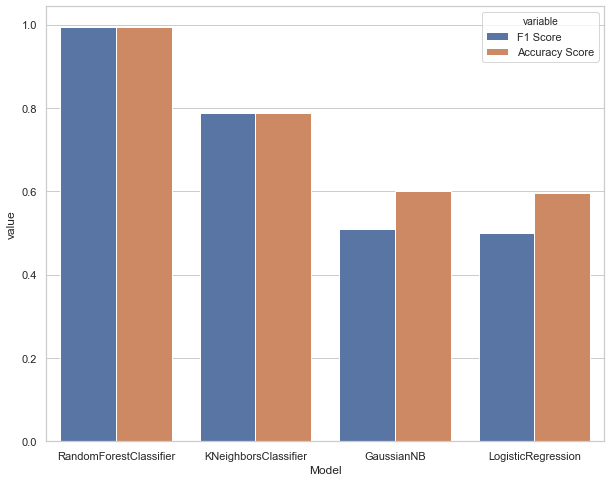

In [163]:
plt.figure(figsize=(10, 8))
sns.barplot(x="Model", y="value", hue = "variable",data=sort_model_dataframe)

#### Given that our data is unbalanced, using Accuracy as our metric wouldn't best reflect how good our model is. And since in terms of business value, there's not a significant difference between the false positives and false negatives here, we decided to used the balanced F1 score. 

#### Based on the F1 score, we picked RandomForestClassifier to be our model

In [173]:
def make_random_cv(clf):
    
    if clf._final_estimator.__class__.__name__ == 'RandomForestClassifier':

        hyperparameters = {
            'classifier__n_estimators': [100],
            "classifier__min_samples_split": list(range(2, 6)),
            "classifier__min_samples_leaf": list(range(1, 6)),
            'classifier__max_features': list(range(1, 10))
        }

        clf_random_cv = RandomizedSearchCV(clf,
                                           hyperparameters,
                                           cv=5,
                                           n_iter=20,
                                           scoring='f1_weighted',
                                           random_state=42, n_jobs=-1)

    return clf_random_cv

In [174]:
rf = make_random_cv(pipelines[0])

In [175]:
rf_model = rf.fit(X_train, y_train)

In [176]:
print(rf_model.best_estimator_._final_estimator)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=8, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)


In [177]:
rf_model.best_estimator_

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                             

In [178]:
rf_model.classes_

array(['fit', 'large', 'small'], dtype=object)

#### F1 score for both the data set

In [179]:
y_pred_train_rf_score = rf.predict(X_train)

In [180]:
y_pred_train_rf_score

array(['fit', 'fit', 'fit', ..., 'large', 'large', 'large'], dtype=object)

In [181]:
accuracy_score(y_train, y_pred_train_rf_score)

0.9957309357994466

In [182]:
print('Training Set F1 Score for RandomForestClassfier:',round(f1_score(y_train, y_pred_train_rf_score, average='weighted'),4))

Training Set F1 Score for RandomForestClassfier: 0.9957


In [259]:
#y_pred_train_rf_score_df = pd.DataFrame(y_pred_train_rf_score)

In [183]:
y_pred_test_rf_score = rf.predict(X_test)

In [184]:
y_pred_test_rf_score

array(['fit', 'fit', 'fit', ..., 'fit', 'fit', 'fit'], dtype=object)

In [186]:
print('Test Set F1 Score for RandomForestClassfier:',round(f1_score(y_test, y_pred_test_rf_score, average='weighted'),3))

Test Set F1 Score for RandomForestClassfier: 0.672


In [261]:
#y_pred_test_rf_score_df = pd.DataFrame(y_pred_test_rf_score)

#### confusion matrix for test

In [187]:
confusion_matrix = confusion_matrix(y_test, y_pred_test_rf_score)

In [188]:
confusion_matrix

array([[26367,   966,  1079],
       [ 4004,   688,   250],
       [ 4163,   232,   761]], dtype=int64)

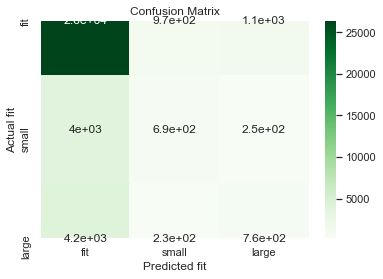

In [201]:
ax = plt.subplot()
sns.heatmap(confusion_matrix, annot = True, ax = ax, cmap = "Greens");
ax.set_xlabel('Predicted fit');ax.set_ylabel('Actual fit'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(y_test.unique()); ax.yaxis.set_ticklabels(y_test.unique());

In [249]:
from sklearn.metrics import classification_report

In [250]:
print(classification_report(y_test , y_pred_test_rf_score))

              precision    recall  f1-score   support

         fit       0.76      0.93      0.84     28412
       large       0.36      0.14      0.20      4942
       small       0.36      0.15      0.21      5156

    accuracy                           0.72     38510
   macro avg       0.50      0.40      0.42     38510
weighted avg       0.66      0.72      0.67     38510



#### confusion matrix for train set

In [215]:
from sklearn.metrics import confusion_matrix

In [217]:
confuse_mat_train = confusion_matrix(y_train , y_pred_train_rf_score)

In [218]:
confuse_mat_train

array([[113584,     38,     24],
       [   390,  39139,      1],
       [   371,      6,  40869]], dtype=int64)

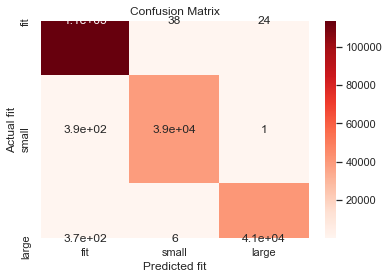

In [223]:
ax = plt.subplot()
sns.heatmap(confuse_mat_train, annot = True, ax = ax, cmap = "Reds");
ax.set_xlabel('Predicted fit');ax.set_ylabel('Actual fit'); 
ax.set_title('Confusion Matrix');
ax.figsize=(10,10)
ax.xaxis.set_ticklabels(y_train.unique()); ax.yaxis.set_ticklabels(y_train.unique());

In [246]:
from sklearn.metrics import classification_report

In [248]:
print(classification_report(y_train , y_pred_train_rf_score))

              precision    recall  f1-score   support

         fit       0.99      1.00      1.00    113646
       large       1.00      0.99      0.99     39530
       small       1.00      0.99      1.00     41246

    accuracy                           1.00    194422
   macro avg       1.00      0.99      1.00    194422
weighted avg       1.00      1.00      1.00    194422



### Random Forest Feature Importances package , creating single pipeline

#### height, weight and bust size are collinear features, we group them together here to examine their feature importance

In [225]:
regressor_rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=8, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [238]:
def make_pipeline(regressor=None):
    "Create a single pipeline that processing the data and then fits the regressor." 
    numeric_features = ['height','size','weight','bust_size_num','body_type_count','rating',\
                        'body_type','category','item_id','rented_for','age_range']
    numeric_transformer = Pipeline(steps=[('imputer', impute.SimpleImputer(strategy='median'))])

    preprocessor = compose.ColumnTransformer(transformers=[
        ('num', numeric_transformer, numeric_features)])

    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                          ('reg', regressor)])

    return pipeline

In [239]:
pipeline_rf  =  make_pipeline(regressor_rf)

In [240]:
pipeline_rf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                             

##### Importances

In [242]:
I = importances(pipeline_rf, X_test, y_test, features=['size',['height','weight','bust_size_num'],'body_type_count','rating',\
                        'body_type','category','item_id','rented_for','age_range'])

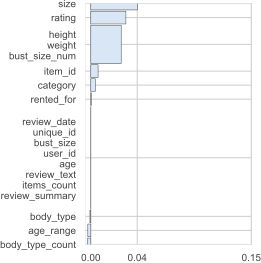

In [243]:
plot_importances(I)

#### we are not grouping them now and lets see what happens

In [257]:
I2 = importances(pipeline_rf, X_test, y_test)

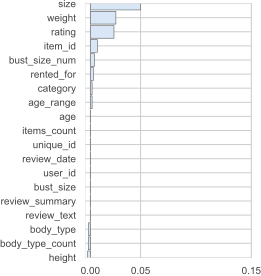

In [258]:
#plt.rcParams["figure.figsize"] = (30, 30)

plot_importances(I2)